# 1) Initialization

In [1]:
# Import the libraries
import pandas as pd
from pandas import Grouper
from datetime import datetime
pd.options.display.max_rows = 500 
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import IFrame
from IPython.display import display
from IPython.display import HTML, Image
import folium
from folium import Marker
from folium.plugins import MarkerCluster
from folium import plugins

### 1.2) We gather the data

In [2]:
df = pd.read_csv("citibike_trips.csv")

# 2) Exploratory Data Analysis

### 2.1) Global dataset overview

In [3]:
#Shape of the dataset
print ("shape of the dataset :", df.shape)

shape of the dataset : (1000, 16)


In [4]:
print("The head of the dataset:")
display(df.head())

The head of the dataset:


,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,customer_plan
0,432,2013-09-16T19:22:43,2013-09-16T19:29:55,509,9 Ave & W 22 St,40.745497,-74.001971,442,W 27 St & 7 Ave,40.746647,-73.993915,18447,Subscriber,1951,male,NaN
1,1186,2015-12-30T13:02:38,2015-12-30T13:22:25,280,E 10 St & 5 Ave,40.733320,-73.995101,254,W 11 St & 6 Ave,40.735324,-73.998004,22598,Subscriber,1945,female,NaN
2,799,2017-09-02T16:27:37,2017-09-02T16:40:57,335,Washington Pl & Broadway,40.729039,-73.994046,540,Lexington Ave & E 29 St,40.743116,-73.982154,28833,Subscriber,1997,male,NaN
3,238,2017-11-15T06:57:09,2017-11-15T07:01:08,146,Hudson St & Reade St,40.716250,-74.009106,387,Centre St & Chambers St,40.712733,-74.004607,21338,Subscriber,1998,female,NaN
4,668,2013-11-07T15:12:07,2013-11-07T15:23:15,529,W 42 St & 8 Ave,40.757570,-73.990985,352,W 56 St & 6 Ave,40.763406,-73.977225,19888,Subscriber,1949,male,NaN


In [5]:
print("The analytics description of the dataset:")
display(df.describe())

The analytics description of the dataset:


,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,customer_plan
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,760.862000,990.772000,40.734512,-73.987983,1088.475000,40.733220,-73.988233,21650.280000,1966.172000,NaN
std,750.114314,1164.328279,0.025569,0.014753,1225.520218,0.025273,0.014999,5044.413181,25.301118,NaN
min,61.000000,72.000000,40.661063,-74.017134,72.000000,40.657089,-74.017134,14543.000000,1885.000000,NaN
25%,344.000000,325.000000,40.717548,-73.997252,336.000000,40.717439,-73.998522,17647.500000,1948.000000,NaN
50%,559.500000,438.000000,40.733320,-73.989169,447.000000,40.732233,-73.988900,20361.000000,1951.000000,NaN
75%,952.250000,533.750000,40.751876,-73.980160,2006.000000,40.749457,-73.980144,25653.250000,1996.000000,NaN
max,15211.000000,3660.000000,40.808200,-73.907744,3664.000000,40.814394,-73.916917,33405.000000,2001.000000,NaN


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             1000 non-null   int64  
 1   starttime                1000 non-null   object 
 2   stoptime                 1000 non-null   object 
 3   start_station_id         1000 non-null   int64  
 4   start_station_name       1000 non-null   object 
 5   start_station_latitude   1000 non-null   float64
 6   start_station_longitude  1000 non-null   float64
 7   end_station_id           1000 non-null   int64  
 8   end_station_name         1000 non-null   object 
 9   end_station_latitude     1000 non-null   float64
 10  end_station_longitude    1000 non-null   float64
 11  bikeid                   1000 non-null   int64  
 12  usertype                 1000 non-null   object 
 13  birth_year               1000 non-null   int64  
 14  gender                   

None

In [7]:
df.isnull().sum()

tripduration                  0
starttime                     0
stoptime                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bikeid                        0
usertype                      0
birth_year                    0
gender                        0
customer_plan              1000
dtype: int64

### 2.2) Cleaning the data

In [8]:
#dropping NaN values
df.drop("customer_plan", axis=1, inplace=True)

In [9]:
#replacing strings in before converting into datetime
df["starttime"]= df['starttime'].str.replace('T', '-').astype(str)
df["stoptime"]= df['stoptime'].str.replace('T', '-').astype(str)

In [10]:
#converting datetime
df['starttime']= pd.to_datetime(df['starttime'], errors='coerce')
df['stoptime']= pd.to_datetime(df['stoptime'], errors='coerce')
df['birth_year'] = pd.to_datetime(df['birth_year'], format='%Y')

In [11]:
#converting birth_year into age in a new column
now = pd.Timestamp('now')
df['birth_year'] = df['birth_year'].where(df['birth_year'] < now, df['birth_year'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['birth_year']).astype('<m8[Y]')
df['age'] = df['age'].astype(int)
print(df)

     tripduration               starttime                stoptime  \
0             432 2013-09-16 19:22:43.000 2013-09-16 19:29:55.000   
1            1186 2015-12-30 13:02:38.000 2015-12-30 13:22:25.000   
2             799 2017-09-02 16:27:37.000 2017-09-02 16:40:57.000   
3             238 2017-11-15 06:57:09.000 2017-11-15 07:01:08.000   
4             668 2013-11-07 15:12:07.000 2013-11-07 15:23:15.000   
..            ...                     ...                     ...   
995          1132 2018-02-04 09:52:10.349 2018-02-04 10:11:02.478   
996           293 2014-01-27 17:13:15.000 2014-01-27 17:18:08.000   
997           734 2017-07-25 12:07:43.000 2017-07-25 12:19:58.000   
998           266 2013-08-04 19:57:02.000 2013-08-04 20:01:28.000   
999           566 2014-06-29 22:19:46.000 2014-06-29 22:29:12.000   

     start_station_id        start_station_name  start_station_latitude  \
0                 509           9 Ave & W 22 St               40.745497   
1                 280

In [12]:
display(df.head())

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,age
0,432,2013-09-16 19:22:43,2013-09-16 19:29:55,509,9 Ave & W 22 St,40.745497,-74.001971,442,W 27 St & 7 Ave,40.746647,-73.993915,18447,Subscriber,1951-01-01,male,71
1,1186,2015-12-30 13:02:38,2015-12-30 13:22:25,280,E 10 St & 5 Ave,40.733320,-73.995101,254,W 11 St & 6 Ave,40.735324,-73.998004,22598,Subscriber,1945-01-01,female,77
2,799,2017-09-02 16:27:37,2017-09-02 16:40:57,335,Washington Pl & Broadway,40.729039,-73.994046,540,Lexington Ave & E 29 St,40.743116,-73.982154,28833,Subscriber,1997-01-01,male,25
3,238,2017-11-15 06:57:09,2017-11-15 07:01:08,146,Hudson St & Reade St,40.716250,-74.009106,387,Centre St & Chambers St,40.712733,-74.004607,21338,Subscriber,1998-01-01,female,24
4,668,2013-11-07 15:12:07,2013-11-07 15:23:15,529,W 42 St & 8 Ave,40.757570,-73.990985,352,W 56 St & 6 Ave,40.763406,-73.977225,19888,Subscriber,1949-01-01,male,73


In [13]:
#The dataset seems pretty clean, let's move on to the fun part; exploring the dataset !

# 3) EXPLORING THE DATA

### 3.1) The Users

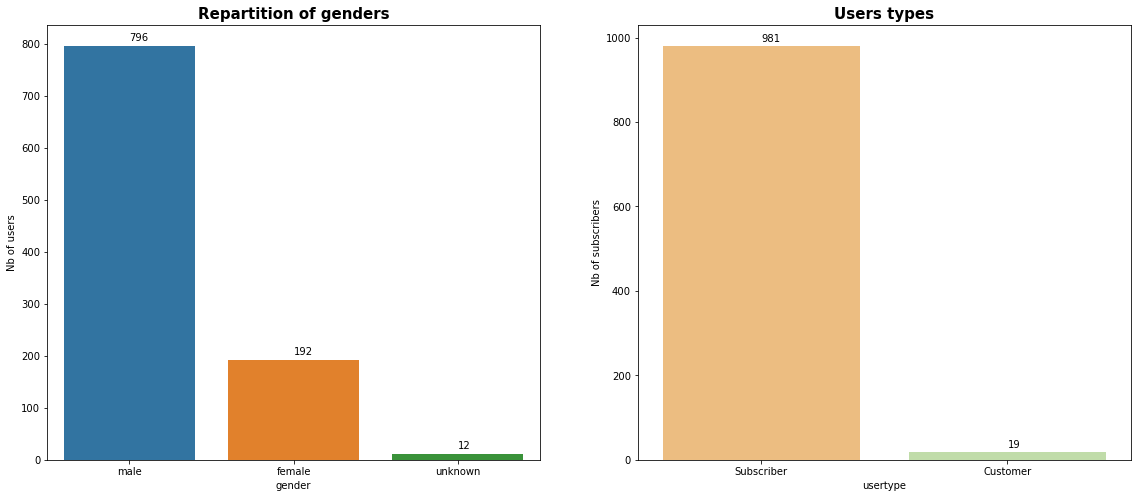

In [14]:
plt.figure(figsize=(30,8))

# first chart : Gender repartition
plt.subplot(131)
ax1 = sns.countplot(x = df["gender"]);
ax1.set_ylabel("Nb of users")
ax1.set_title("Repartition of genders", fontsize = 15, fontweight='bold')
for i in ax1.patches: #loop to print value of people on top of the bars
    ax1.text(i.get_x() +0.40, i.get_height()+10,str(round((i.get_height()), 2)),fontsize = 10)

# Second chart : User Type
plt.subplot(132) 
ax2 = sns.countplot(x = df["usertype"], palette='Spectral');
ax2.set_ylabel("Nb of subscribers")
ax2.set_title("Users types", fontsize = 15, fontweight='bold')
for i in ax2.patches: #loop to print value of people on top of the bars
    ax2.text(i.get_x() +0.40, i.get_height()+10,str(round((i.get_height()), 2)),fontsize = 10)

#### - The majority of Citibike Users are Male 
#### - The majority of Citibike Users are Subscribers

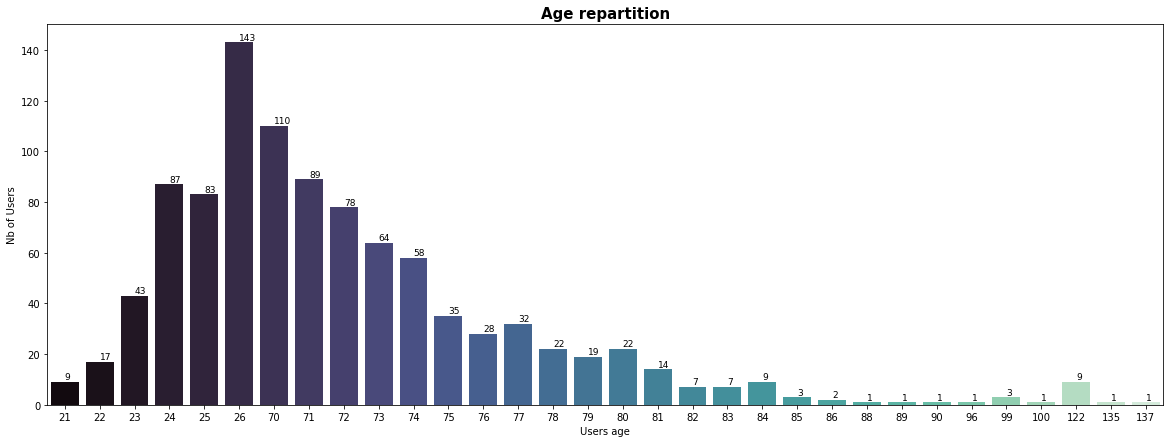

In [15]:
plt.figure(figsize=(20,7))
ax1 = sns.countplot(x = df["age"], palette='mako');
ax1.set_title("Age repartition", fontsize = 15, fontweight='bold')
ax1.set_ylabel("Nb of Users")
ax1.set_xlabel("Users age")
for i in ax1.patches:
    ax1.text(i.get_x() +0.40, i.get_height()+1,str(round((i.get_height()), 2)),fontsize = 9)
plt.show;

In [16]:
#Age prep for visualisation
def age(x=0):
    if x>85:
        return "Outliers"
    elif x>70:
        return "70-85"
    elif x>50:
        return "50-70"
    elif x>30:
        return "30-50"
    elif x>20:
        return "20-30"
    else:
        return "No info"

df["Age_type"] = df["age"].apply(lambda x: "Outliers" if x>85
                                                else "70-85" if x>70
                                                else "60-70" if x>50
                                                else "30-50" if x>30
                                                else "20-30" if x>20
                                                else "No info")

df["Age_type"] = df["age"].apply(age)


In [17]:
age_type = df.groupby("Age_type")['age'].count()
age_type

Age_type
20-30       382
50-70       110
70-85       487
Outliers     21
Name: age, dtype: int64

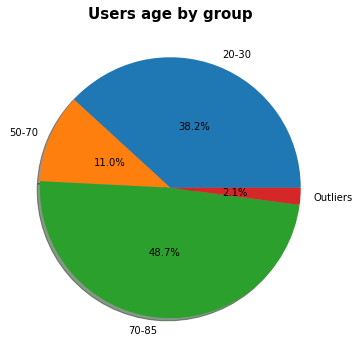

In [18]:
#Users age groups
pie, ax = plt.subplots(figsize=[18,6])
labels = age_type.keys()
plt.pie(x=age_type, autopct="%.1f%%", explode=[0]*4, labels=labels, pctdistance=0.5, startangle=0, shadow=True)
plt.title("Users age by group", fontsize = 15, fontweight='bold')
pie.set_facecolor('white')
plt.show()

#### - Half of the users are older than 70 years old

In [19]:
df.groupby(['usertype', 'gender']).age.mean()

usertype    gender 
Customer    female     25.000000
            male       28.692308
Subscriber  female     52.736559
            male       57.241379
            unknown    56.333333
Name: age, dtype: float64

#### - It seems that younger users tends to be Customers while older users tends to be subscribers

# 3.2) The Bike Trips 

In [20]:
df['tripduration'].mean()

760.862

#### - The mean trip duration is 760 seconds which equals to an average bike trip of 12 minutes.

In [21]:
df['start_station_name'].value_counts().head(5)

E 12 St & 3 Ave            13
Broadway & E 14 St         12
Lexington Ave & E 24 St    11
LaGuardia Pl & W 3 St      10
W 21 St & 6 Ave             9
Name: start_station_name, dtype: int64

In [22]:
df['end_station_name'].value_counts().head(5)

W 13 St & 6 Ave             16
Washington Pl & Broadway    13
E 13 St & Avenue A          13
E 12 St & 3 Ave             13
LaGuardia Pl & W 3 St       11
Name: end_station_name, dtype: int64

#### The most common route is :
    
W 13 St & 6 Ave to W 13 St & 6 Ave 


In [23]:
#Most common route visualisation 

#Map route
map_plot_route = folium.Map(location=[40.732233,-73.9889], zoom_start=16)

#Routeinfo
route_info=[[40.732233,-73.9889], 
           [40.729554,-73.994046]]

plugins.AntPath(route_info).add_to(map_plot_route)

#Save map
map_plot_route.save("./common_route.html")

map_plot_route

#### - The TOP 5 starting stations are :

- E 12 St & 3 Ave            
- Broadway & E 14 St         
- Lexington Ave & E 24 St    
- LaGuardia Pl & W 3 St      
- W 21 St & 6 Ave   

In [24]:
#Top 5 starting stations by order of importance
#data 
cm_enum_df=pd.DataFrame({'city': ['E 12 St & 3 Ave', 'Broadway & E 14 St', 'Lexington Ave & E 24 St', 'LaGuardia Pl & W 3 St', 'W 21 St & 6 Ave'], 
                         'latitude': [40.732233, 40.734546, 40.740259, 40.72917, 40.74174],
                         'longitude': [-73.9889, -73.990741, -73.984092, -73.998102, -73.994156], 
                         'icon_num': [1,2,3,4,5]})
#map
map_enum_icons = folium.Map([40.735, -74.00], zoom_start=15)

#icons
for i in cm_enum_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.city,
                  icon=plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='red', 
                                            border_width=2,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(map_enum_icons)
    
#Save map
map_enum_icons.save("./starting_station_map.html")

map_enum_icons

#### - The TOP 5 ending stations are :

- W 13 St & 6 Ave             
- Washington Pl & Broadway    
- E 13 St & Avenue A          
- E 12 St & 3 Ave             
- LaGuardia Pl & W 3 St 

In [25]:
#Top 5 ending stations by order of importance
#data 
cm_enum_df2=pd.DataFrame({'city': ['W 13 St & 6 Ave', 'Washington Pl & Broadway', 'E 13 St & Avenue A', 'E 12 St & 3 Ave', 'LaGuardia Pl & W 3 St'], 
                         'latitude': [40.736494	, 40.729039, 40.729554, 40.732233, 40.72917],
                         'longitude': [-73.997044, -73.994046, -73.980572, -73.9889, -73.998102], 
                         'icon_num': [1,2,3,4,5]})
#map
map_enum_icons2 = folium.Map([40.735, -74.00], zoom_start=15)

#icons
for i in cm_enum_df2.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.city,
                  icon=plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='red', 
                                            border_width=2,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(map_enum_icons2)
    
#Save map
map_enum_icons2.save("./ending_station_map.html")

map_enum_icons2